<a href="https://colab.research.google.com/github/sidneyarcidiacono/fastai-practical-deep-learning/blob/main/notebooks/snake_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
     |████████████████████████████████| 727kB 5.5MB/s 
     |████████████████████████████████| 194kB 14.2MB/s 
     |████████████████████████████████| 1.1MB 19.7MB/s 
     |████████████████████████████████| 51kB 5.3MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
Mounted at /content/gdrive


In [2]:
from fastbook import *
from fastai.vision.widgets import *

In [3]:
import os
key = os.environ.get('AZURE_SEARCH_KEY', 'bd220979600745d3b0f6aa712b11d062')

In [4]:
results = search_images_bing(key, 'python')
ims = results.attrgot('content_url')
len(ims)

150

In [5]:
#hide
ims = ['https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fupload.wikimedia.org%2Fwikipedia%2Fcommons%2Fthumb%2Fb%2Fb4%2FPython_reticulatus_%25D1%2581%25D0%25B5%25D1%2582%25D1%2587%25D0%25B0%25D1%2582%25D1%258B%25D0%25B9_%25D0%25BF%25D0%25B8%25D1%2582%25D0%25BE%25D0%25BD-2.jpg%2F1200px-Python_reticulatus_%25D1%2581%25D0%25B5%25D1%2582%25D1%2587%25D0%25B0%25D1%2582%25D1%258B%25D0%25B9_%25D0%25BF%25D0%25B8%25D1%2582%25D0%25BE%25D0%25BD-2.jpg&f=1&nofb=1']

In [7]:
drive.mount('/content/drive')
dest = 'drive/MyDrive/snake-images/python.jpg'
download_url(ims[0], dest)

Mounted at /content/drive


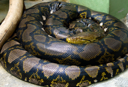

In [8]:
im = Image.open(dest)
im.to_thumb(128,128)

In [9]:
snake_types = 'python','viper','cobra'
path = Path('snakes')

In [10]:
if not path.exists():
    path.mkdir()
    for o in snake_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} snake')
        download_images(dest, urls=results.attrgot('contentUrl'))

In [11]:
fns = get_image_files(path)
fns

(#432) [Path('snakes/python/00000051.jpg'),Path('snakes/python/00000148.jpg'),Path('snakes/python/00000124.JPG'),Path('snakes/python/00000085.jpg'),Path('snakes/python/00000041.jpg'),Path('snakes/python/00000058.jpg'),Path('snakes/python/00000142.jpg'),Path('snakes/python/00000005.jpg'),Path('snakes/python/00000079.jpg'),Path('snakes/python/00000130.jpg')...]

In [12]:
failed = verify_images(fns)
failed

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


(#6) [Path('snakes/python/00000032.jpg'),Path('snakes/viper/00000140.jpg'),Path('snakes/viper/00000031.jpg'),Path('snakes/viper/00000096.jpg'),Path('snakes/viper/00000024.jpg'),Path('snakes/cobra/00000131.jpg')]

In [13]:
failed.map(Path.unlink);

In [14]:
snakes = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [15]:
dls = snakes.dataloaders(path)

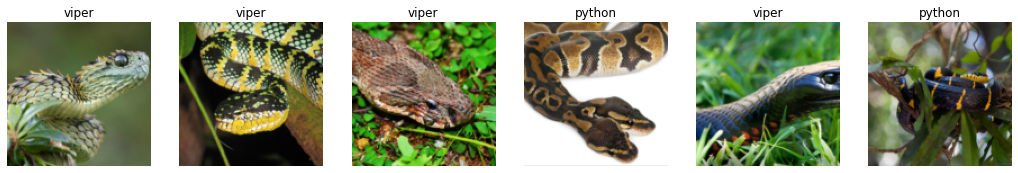

In [16]:
dls.valid.show_batch(max_n=6, nrows=1)

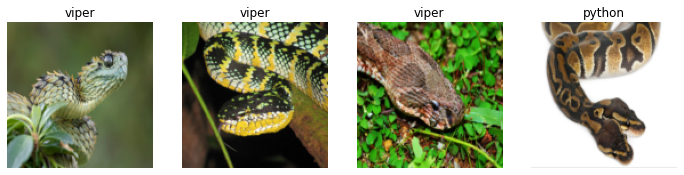

In [17]:
snakes = snakes.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = snakes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

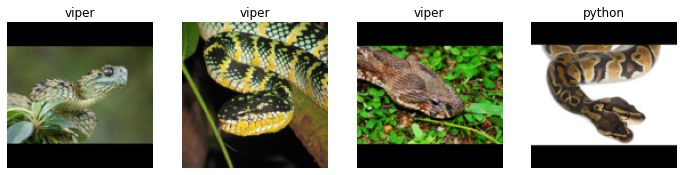

In [18]:
snakes = snakes.new(item_tfms=Resize(128, ResizeMethod.Pad, pad_mode='zeros'))
dls = snakes.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

In [19]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))
/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


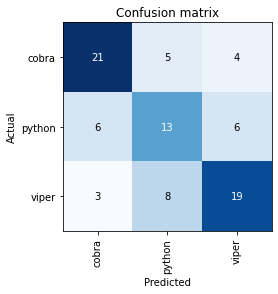

In [20]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

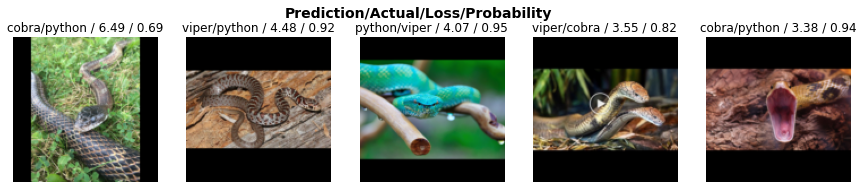

In [21]:
interp.plot_top_losses(5, nrows=1)

In [22]:
cleaner = ImageClassifierCleaner(learn)
cleaner

/usr/local/lib/python3.6/dist-packages/PIL/TiffImagePlugin.py:788: UserWarning: Corrupt EXIF data.  Expecting to read 4 bytes but only got 0. 
  warnings.warn(str(msg))


In [25]:
# for idx in cleaner.delete(): cleaner.fns[idx].unlink()
# for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [26]:
learn.export()

In [27]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [28]:
learn_inf = load_learner(path/'export.pkl')

In [29]:
learn_inf.predict('drive/MyDrive/snake-images/python.jpg')

('python', tensor(1), tensor([0.4766, 0.4986, 0.0248]))

In [30]:
learn_inf.dls.vocab

['cobra', 'python', 'viper']

In [31]:
btn_upload = widgets.FileUpload()
btn_upload

FileUpload(value={}, description='Upload')

In [34]:
img = PILImage.create(btn_upload.data[-1])

In [35]:
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

Output()

In [36]:
pred,pred_idx,probs = learn_inf.predict(img)

In [37]:
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

Label(value='Prediction: python; Probability: 0.6354')

In [38]:
btn_run = widgets.Button(description='Classify')
btn_run

Button(description='Classify', style=ButtonStyle())

In [39]:
def on_click_classify(change):
    img = PILImage.create(btn_upload.data[-1])
    out_pl.clear_output()
    with out_pl: display(img.to_thumb(128,128))
    pred,pred_idx,probs = learn_inf.predict(img)
    lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'

btn_run.on_click(on_click_classify)

In [40]:
btn_upload = widgets.FileUpload()

In [45]:
VBox([widgets.Label('Select your bear!'), 
      btn_upload, btn_run, out_pl, lbl_pred])

In [44]:
# !pip install voila
# !jupyter serverextension enable --sys-prefix voila 